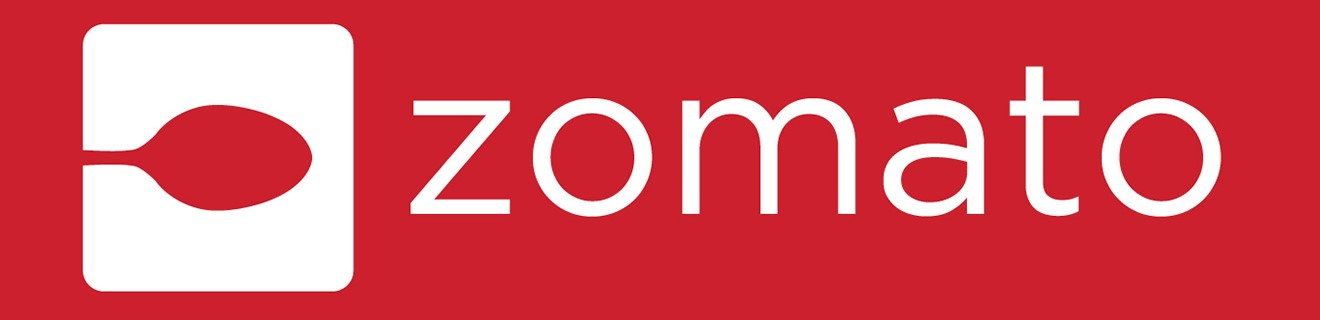

# **IMPORTING MODULES**

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **LOADING DATA-SET**

In [212]:
df = pd.read_excel('zomato_rest_data (2).xlsx')
df

,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


# **DATA CLEANING**

In [213]:
# dropping the unwanted columns ['Unnamed: 0','url','address','phone','dish_liked','menu_item','reviews_list','listed_in(city)']
column = ['Unnamed: 0','url','address','phone','dish_liked','menu_item','reviews_list','listed_in(city)']
df.drop(column,axis = 1, inplace = True)

In [214]:
# dropping duplicate rows
df.drop_duplicates(inplace = True)

In [215]:
# renaming the columns
df.rename(columns = {'approx_cost(for two people)':'cost for 2',
                     'listed_in(type)':'type'}, inplace = True)

In [216]:
# replacing "NEW", "-" with NAN in rate columns
out = []
for value in df['rate']:
  if value == 'NEW' or value == '-':
    out.append(np.nan)
  else:
    out.append(value)
df['rate'] = out

In [217]:
# handling '/5'  in rate columns and converting rate columns into float data type
out = []
for value in df['rate']:
  if value == np.nan:
    out.append(value)
  else:
    # new_value = str(value).split('/')[0]
    # out.append(float(new_value))
    out.append(float(str(value).split('/')[0]))
df['rate'] = out

In [218]:
# handling the NAN values in rate columns
df['rate'] = df['rate'].fillna(round(df['rate'].mean()))

In [219]:
# handling the location column
loc = df['location'].value_counts()
locless300 = loc[loc<300]
out = []
for value in df['location']:
  if value in locless300:
    out.append("Others")
  else:
    out.append(value)
df['location'] = out

In [220]:
# dropping the nan value from the df
df.dropna(inplace=True)

In [221]:
# handling rest_type column
rest_typ = df['rest_type'].value_counts()
rest_typeless1000 = rest_typ[rest_typ < 1000]
out = []
for value in df['rest_type']:
  if value in rest_typeless1000:
    out.append("Others")
  else:
    out.append(value)
df['rest_type'] = out

In [222]:
# handling cuisines column
cui = df['cuisines'].value_counts()
cuiless300 = cui[cui < 300]
output = []
for value in df['cuisines']:
  if value in cuiless300:
    output.append("Others")
  else:
    output.append(value)
df['cuisines'] = output

**Cleaning "cost for 2" column**

In [223]:
df['cost for 2'] = df['cost for 2'].str.replace(',',"")
df['cost for 2'] = df['cost for 2'].astype(int)

In [224]:
# resetting the index
df.reset_index(inplace = True)
df.drop('index', axis = 1, inplace = True)

# **DATA VISUALIZATION**

In [225]:
# colour for zomato
palette_colour = sns.color_palette(['#CB202D','#2D2D2D'])

In [250]:
# this function will help in displaying data points of bins
def bin_label(plot):
  for value in plot.containers:
    plot.bar_label(value, color = 'white', label_type = 'center')

## Analysing Online Order and Book Table

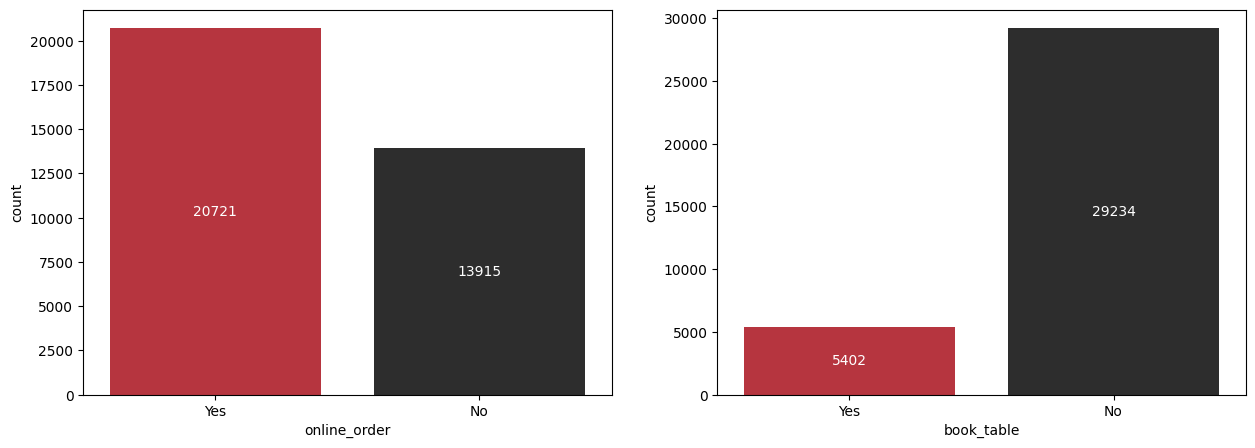

In [227]:
# Analysing count of 'online_order' and 'book_table' columns

fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
var = sns.countplot(data = df, x = 'online_order', hue = 'online_order', palette = palette_colour, ax=axes[0] )
bin_label(var)

var1 = sns.countplot(data = df, x = 'book_table', hue = 'book_table', palette = palette_colour, ax=axes[1])
bin_label(var1)
plt.show()

**Restaurants with online order facility are more. Restaurants without book table facility are more.**

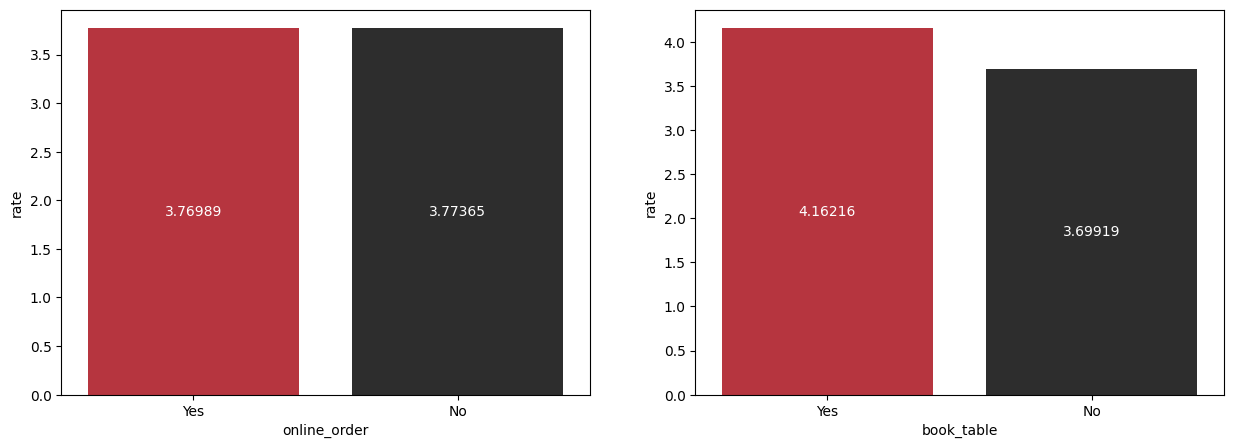

In [228]:
# Analysing the rating of online order and book table facility

fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

var = sns.barplot(data = df, x = 'online_order',y = 'rate', hue = 'online_order', palette = palette_colour,errorbar=None, ax = axes[0])
bin_label(var)

var1 = sns.barplot(data = df, x = 'book_table',y = 'rate', hue = 'book_table', palette = palette_colour,errorbar = None, ax = axes[1])
bin_label(var1)
plt.show()

**For online order facility rating is almost same. Restaurants which are providing book table facility are having highest rating.**

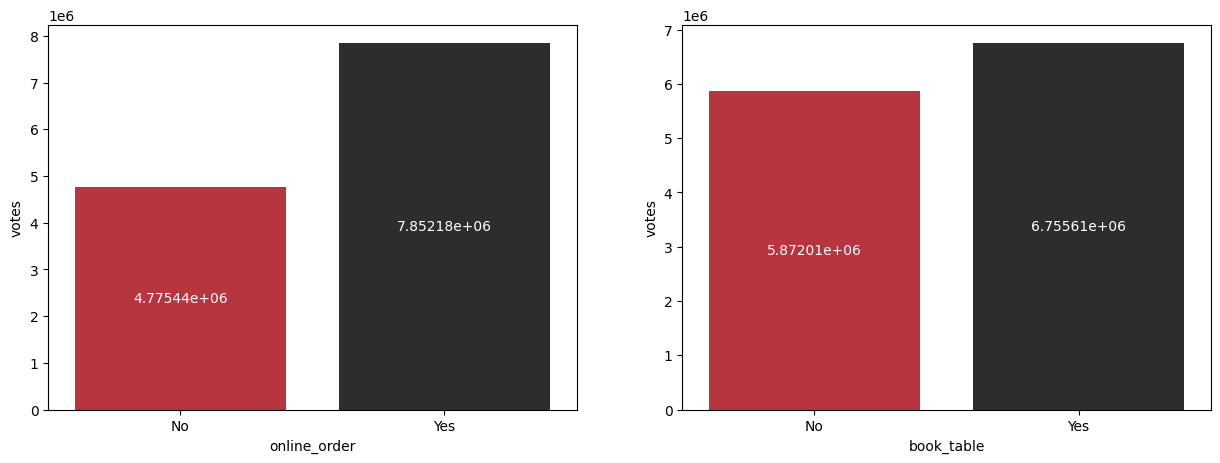

In [229]:
# Analysing online order and book table by votes

fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

var1 = df.groupby('online_order')['votes'].sum()
new_df1 = pd.DataFrame(var1)

var2 = df.groupby('book_table')['votes'].sum()
new_df2 = pd.DataFrame(var2)

myplot1 = sns.barplot(data = new_df1, x = 'online_order', y = 'votes', hue = 'online_order', palette = palette_colour,errorbar = None, ax = axes[0])
bin_label(myplot1)

myplot2 = sns.barplot(data = new_df2, x = 'book_table', y = 'votes', hue = 'book_table', palette = palette_colour,errorbar = None, ax = axes[1])
bin_label(myplot2)
plt.show()

**People are Interested in restaurants which are providing both facilities online order as well as book table.**

## Analysing Location

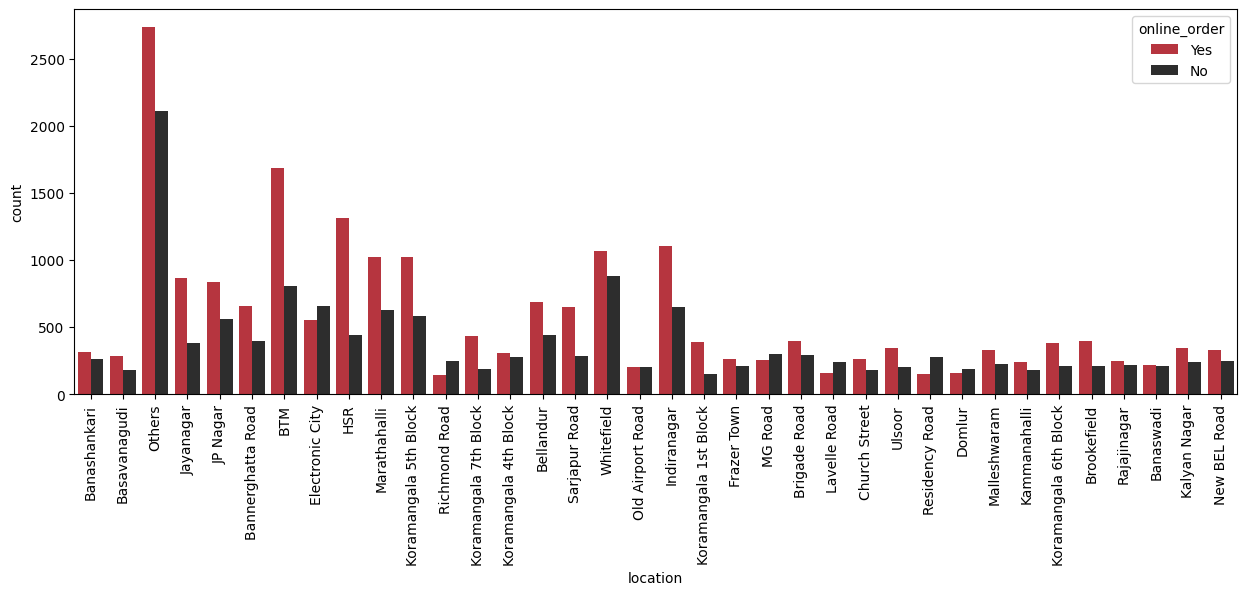

In [230]:
# Analysing location by online order
plt.figure(figsize = (15,5))
var = sns.countplot(data = df, x = 'location', hue = 'online_order', palette = palette_colour)
plt.xticks(rotation = 90)
plt.show()

**On places like Richmond Road, Residency Road, Domlur,etc are having less number of restraunts which are  providing online order facility.**

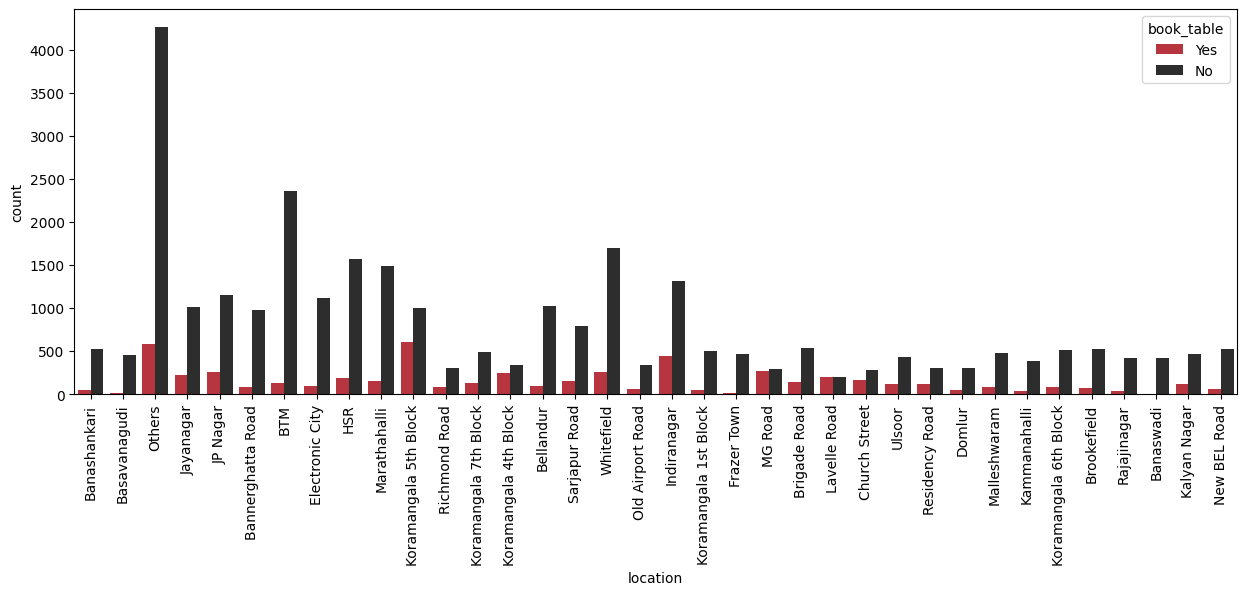

In [231]:
# Analysing location by book_table
plt.figure(figsize = (15,5))
var = sns.countplot(data = df, x = 'location', hue = 'book_table', palette = palette_colour)
plt.xticks(rotation = 90)
plt.show()

**On most of the locations book table facility is not there.**

## Analysing Restaurant Type

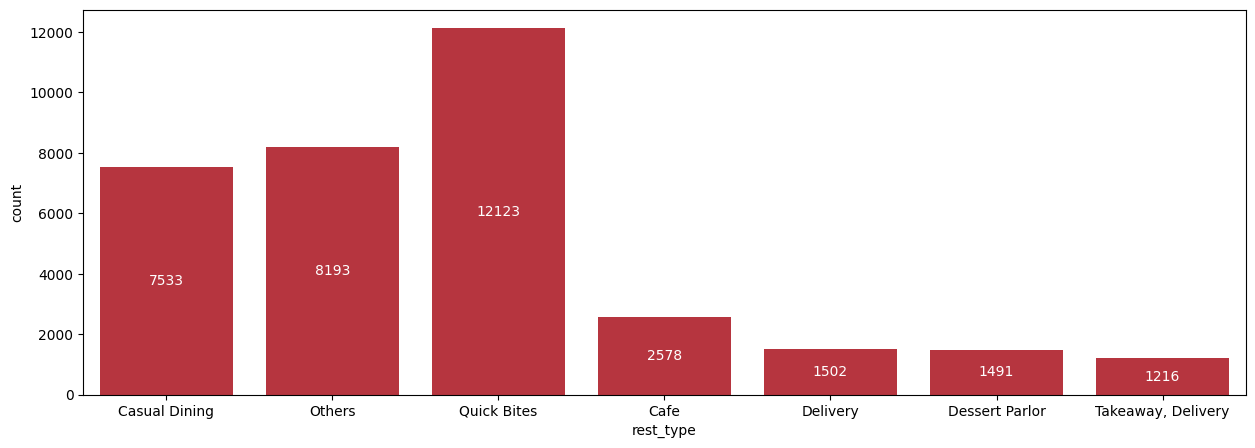

In [232]:
#rest_type
plt.figure(figsize = (15,5))
var = sns.countplot(data = df, x = 'rest_type', color='#CB202D')
bin_label(var)

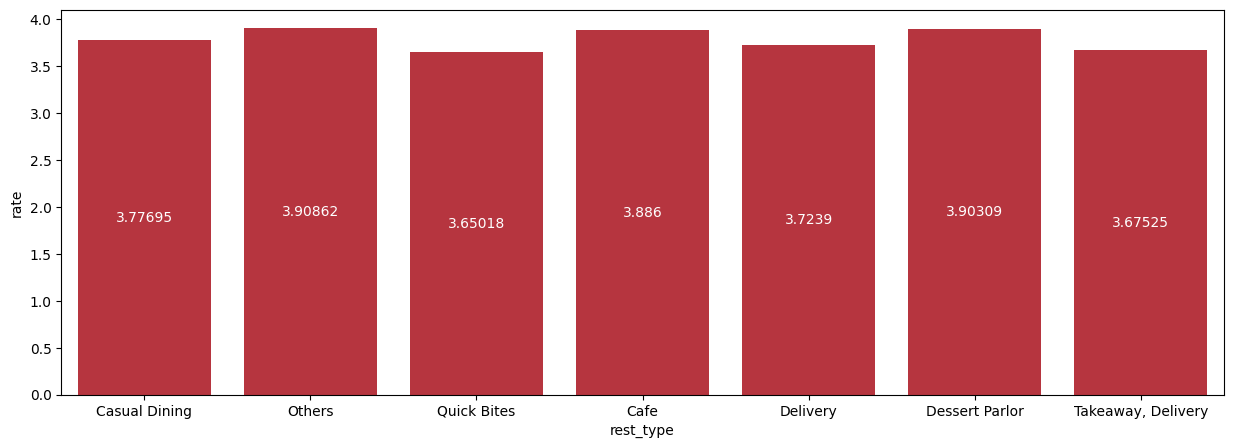

In [233]:
# rest type with rate
plt.figure(figsize = (15,5))
var = sns.barplot(data = df, x = 'rest_type', y = 'rate', errorbar = None, color = '#CB202D')
bin_label(var)

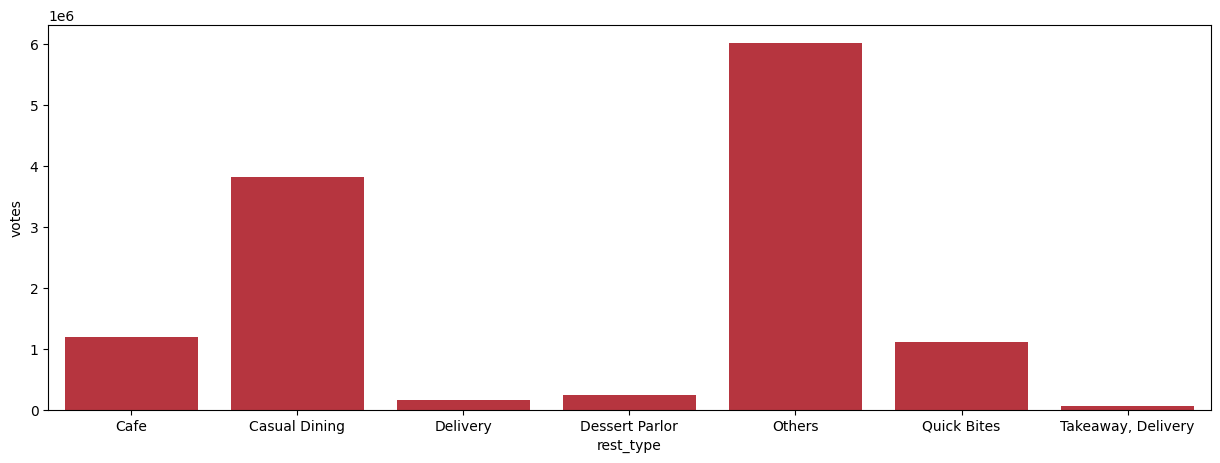

In [234]:
# rest_type with votes
temp = df.groupby('rest_type')['votes'].sum()
new_df = pd.DataFrame(temp)

plt.figure(figsize = (15,5))
var = sns.barplot(data = new_df, x = 'rest_type',y = 'votes',color = '#CB202D')
plt.show()

**People like Quick Bites,Desert_Parlour and Casual Dining Restaraunts**

## Analysing Cuisines

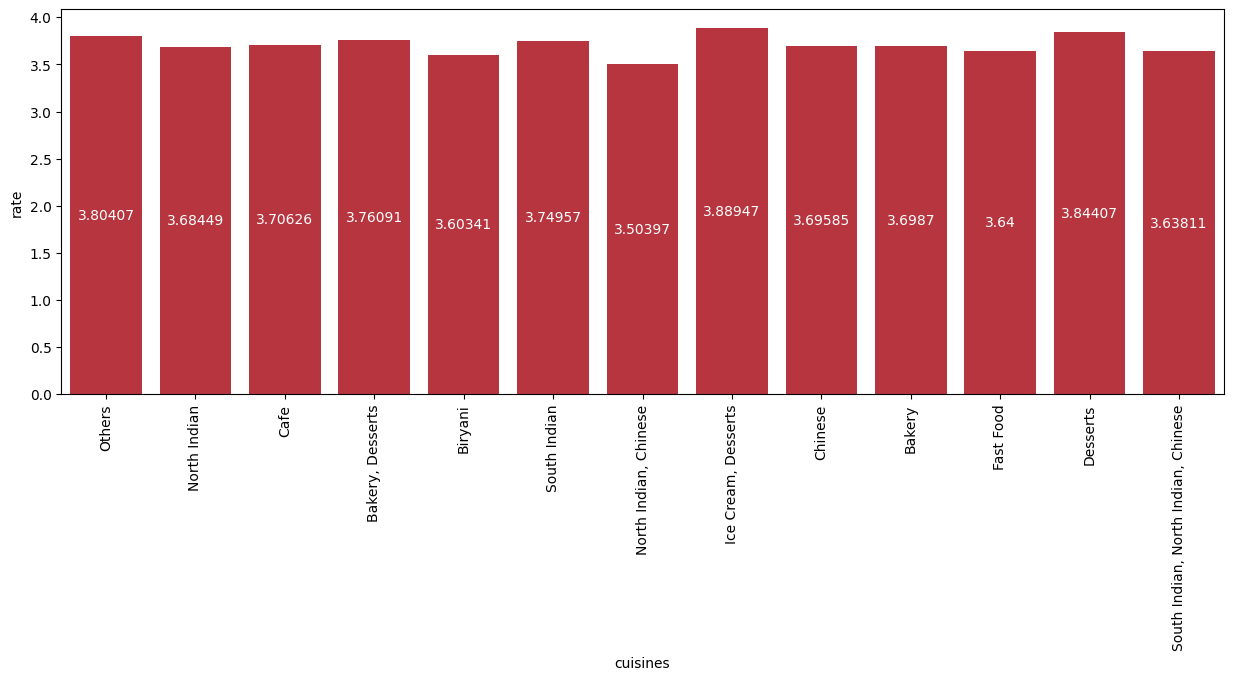

In [251]:
#cuisines with rate column
plt.figure(figsize = (15,5))
var = sns.barplot(data = df, x = 'cuisines', y = 'rate', color = '#CB202D', errorbar = None)
bin_label(var)
plt.xticks(rotation = 90)
plt.show()

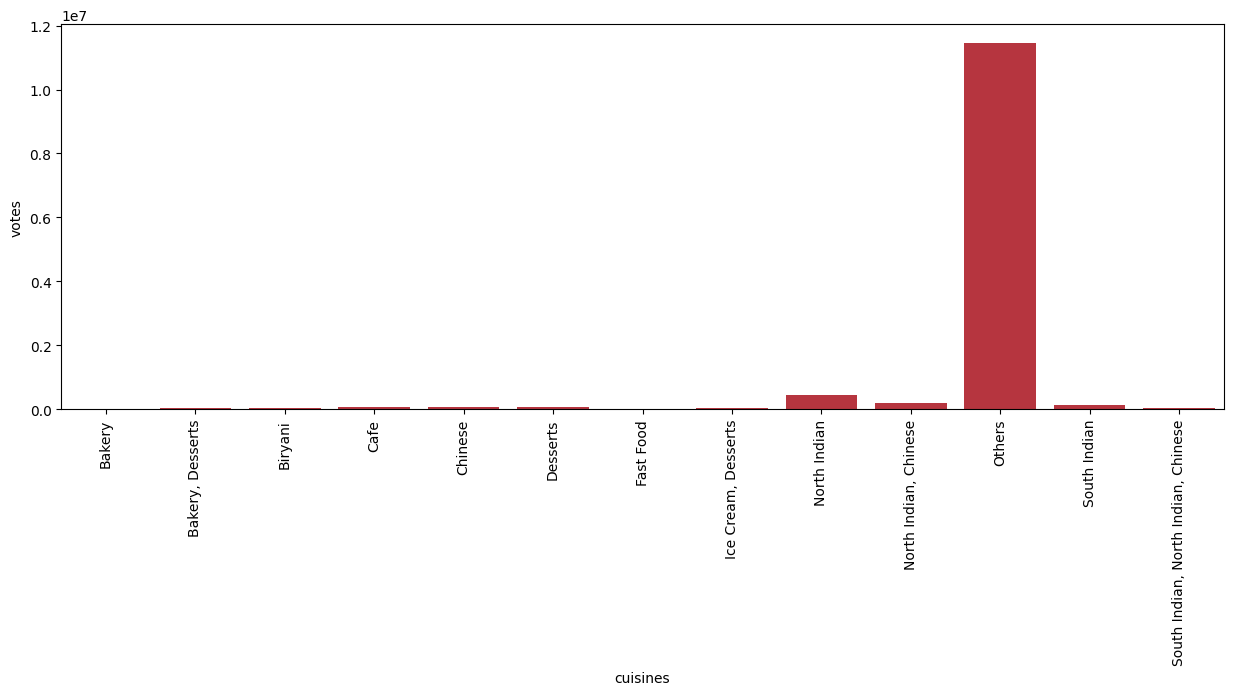

In [255]:
# cuisine with votes column
var = df.groupby('cuisines')['votes'].sum()
temp_df = pd.DataFrame(var)

plt.figure(figsize=(15,5))
sns.barplot(data = temp_df, x = 'cuisines', y = 'votes', errorbar = None, color = '#CB202D')
plt.xticks(rotation = 90)
plt.show()

**People's interest is more for North indian, Chinese, South Indian, Ice-Cream and Desserts.**

## Analysing Type

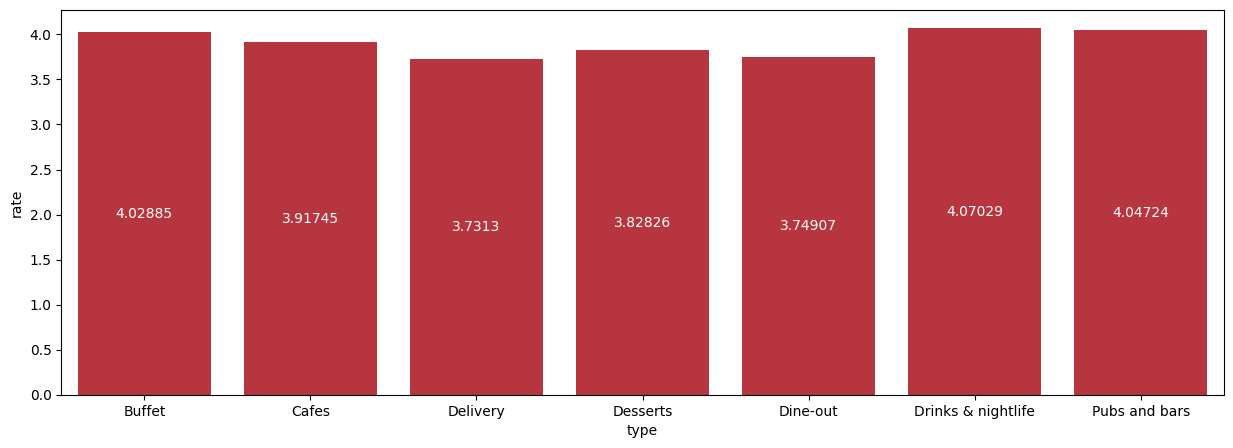

In [260]:
plt.figure(figsize = (15,5))
var = sns.barplot(data = df, x = 'type', y = 'rate', errorbar = None, color = '#CB202D')
bin_label(var)
plt.show()

**For Drinks and night life,pubs&bars and buffet rating is more.**

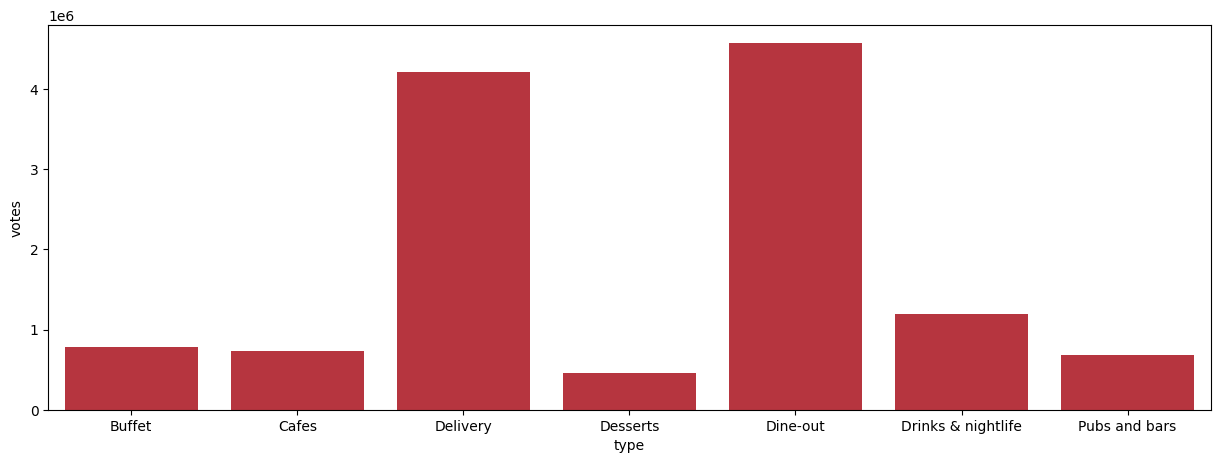

In [263]:
plt.figure(figsize = (15,5))
var = df.groupby('type')['votes'].sum()
temp_df = pd.DataFrame(var)
sns.barplot(data = temp_df, x = 'type', y = 'votes', errorbar = None, color = '#CB202D')
plt.show()

**No. of votes for Delivery and Dineout are more.**

## Charges for Two Person

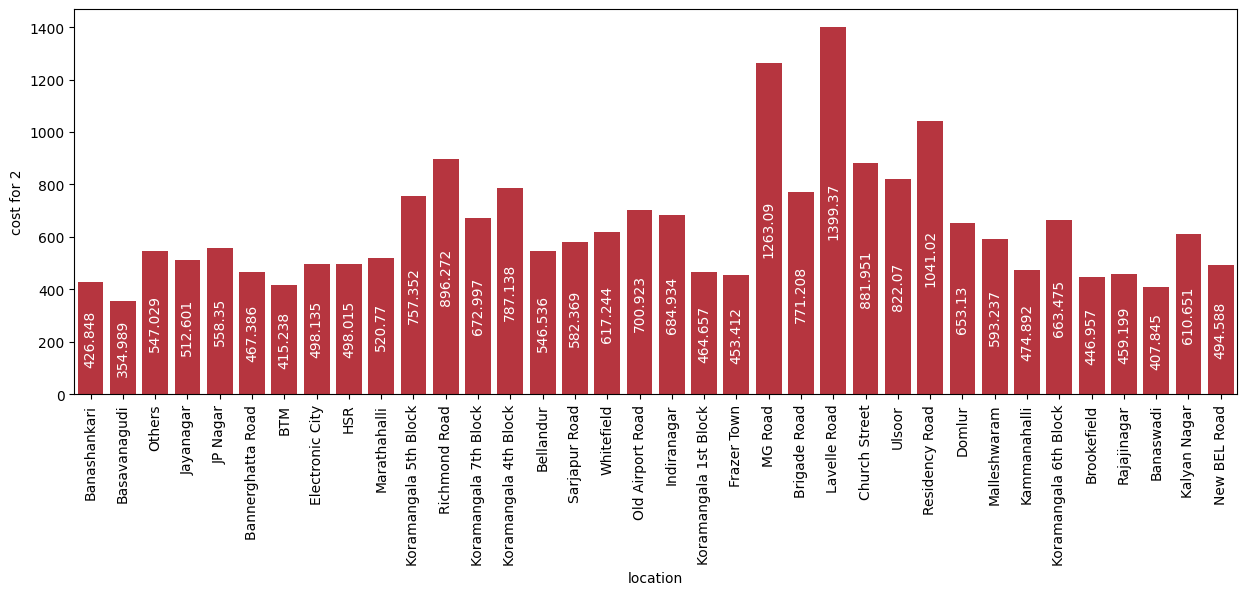

In [266]:
plt.figure(figsize=(15,5))
var = sns.barplot(x='location',y='cost for 2',data=df,color='#CB202D',errorbar=None)

for value in var.containers:
  var.bar_label(value, label_type='center', color='white', rotation=90)
plt.xticks(rotation = 90)
plt.show()

**Most of the restaurants are charging 595 Rs on an average for 2 people.**